In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=3
import numpy as np
import os
import matplotlib.pyplot as plt
import umap
import pickle
import matplotlib
from vis_utils.plot import plot_all_losses

env: CUDA_VISIBLE_DEVICES=3


In [2]:
dir_path = "../data/cifar10"
fig_path = "../figures"
seed = 0

In [3]:
#load the data
cifar10_resnet50 = np.load(os.path.join(dir_path, "cifar10_resnet50_features.npy"))
cifar10_labels = np.load(os.path.join(dir_path, "cifar10_labels.npy"))
with open(os.path.join(dir_path, 'class_names')) as f:
    cifar10_class_names = f.readlines()
    cifar10_class_names = np.array([name.rstrip(",\n") for name in cifar10_class_names])

In [6]:
try:
    with open(os.path.join(dir_path, f"cifar_umapperns_after_seed_{seed}.pkl"), "rb") as file:
        umapperns_after = pickle.load(file)
        embd_after = umapperns_after.embedding_
except FileNotFoundError:
    umapperns_after = umap.UMAP(log_losses="after",
                                  random_state=seed,
                                  verbose=True)
    embd_after = umapperns_after.fit_transform(cifar10_resnet50)
    with open(os.path.join(dir_path, f"cifar_umapperns_after_seed_{seed}.pkl"), "wb") as file:
        pickle.dump(umapperns_after, file, pickle.HIGHEST_PROTOCOL)

Wed Oct 27 13:39:33 2021 Building and compiling search function


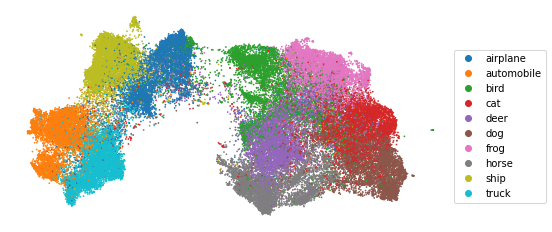

In [7]:
plt.figure(figsize=(8,8))
scatter = plt.scatter(*embd_after.T,
                      c=cifar10_labels,
                      s=0.5,
                      alpha=1.0,
                      cmap="tab10")
plt.axis("off")
plt.gca().set_aspect("equal")

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in plt.get_cmap("tab10").colors]
plt.legend(markers, cifar10_class_names, numpoints=1, loc=(1.0, 0.1))


plt.savefig(os.path.join(fig_path, f"cifar_after_seed_{seed}.png"),
            bbox_inches = 'tight',
            pad_inches = 0,dpi=300)

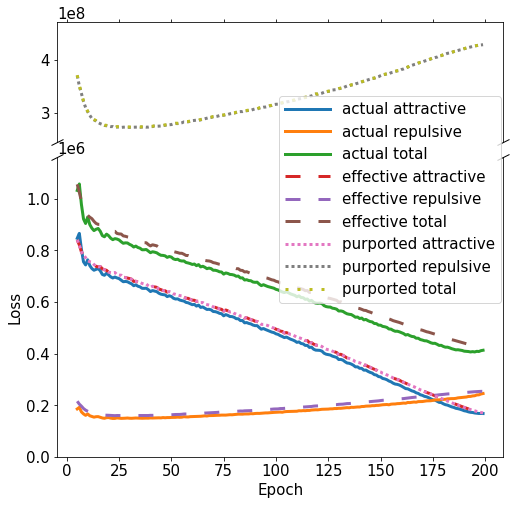

In [8]:
start=5 # omit early epochs where UMAP's sampling approximation is poor
matplotlib.rcParams.update({'font.size': 15})
fig_losses_after = plot_all_losses(umapperns_after.aux_data,
                                   start=5,
                                   leg_loc=(0.535, 0.4))
fig_losses_after.savefig(os.path.join(fig_path, f"cifar_after_losses_{start}_seed_{seed}.png"),
                         bbox_inches = 'tight',
                         pad_inches = 0,
                         dpi=300)




